In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
import graphviz
from sklearn.metrics import mean_squared_error
link = 'https://raw.githubusercontent.com/UC-MACSS/persp-model_W18/04d1cc45ffbcd413bacfb866feadc29346a59f6b/ProblemSets/PS6/biden.csv'
df = pd.read_csv(link).dropna()

# (a)

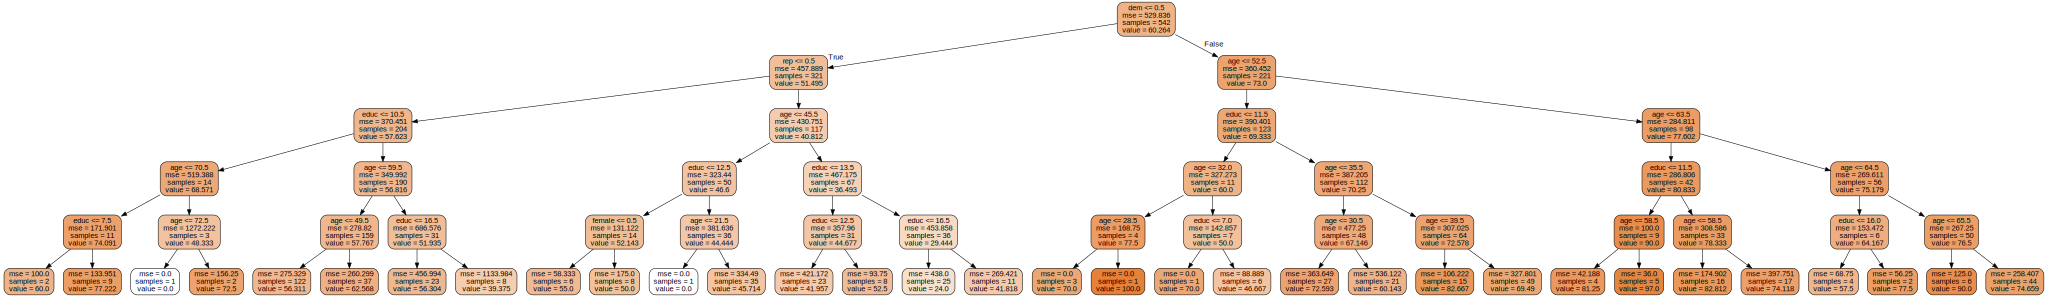

In [129]:
# TRAIN TEST SPLIT
response = ['biden']
predictor =  [i for i in df.columns if i != 'biden']
x = df[predictor]
y = df[response]

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.70, 
                                                    random_state=4)
tree_a = DecisionTreeRegressor(max_depth=5)
tree_a.fit(x_train, y_train)
tree_a_figure = export_graphviz(tree_a,out_file=None,
    feature_names=predictor,
    rounded=True,
    filled=True)
graph = graphviz.Source(tree_a_figure)
graph.render('iris')
graph

In [130]:
y_pred = tree_a.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE for this tree is: ', MSE)

MSE for this tree is:  470.80151707845124


# (b)

# (c)

In [188]:
tree_c = BaggingRegressor(DecisionTreeRegressor(), 
                          random_state = 4, n_estimators = 150,
                          max_samples = 150, bootstrap = True, 
                          oob_score = True)

tree_c.fit(x_train, np.ravel(y_train))
y_pred = tree_c.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
importances = np.mean([i.feature_importances_ for i in tree_c.estimators_
], axis = 0)
indices = np.argsort(importances)[::-1]
# From http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

print('MSE for this tree is: ', MSE)
print("\nFeature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, predictor[f], importances[indices[f]]))

MSE for this tree is:  436.95726687991015

Feature ranking:
1. female (0.437709)
2. age (0.206769)
3. educ (0.173775)
4. dem (0.122954)
5. rep (0.058792)


# (d)

In [197]:
# From http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regr = RandomForestRegressor(max_features = 1, random_state=4, n_estimators = 100, bootstrap = True, oob_score = True)
regr.fit(x_train, np.ravel(y_train))
y_pred = regr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE for m = 1 is: ', MSE)

MSE for m = 1 is:  514.6751562307453


In [198]:

# From http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regr = RandomForestRegressor(max_features = 2, random_state=4, n_estimators = 100, bootstrap = True, oob_score = True)
regr.fit(x_train, np.ravel(y_train))
y_pred = regr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE for m = 2 is: ', MSE)

MSE for m = 2 is:  509.05474336685046


In [200]:
# From http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regr = RandomForestRegressor(max_features = 3, random_state=4, n_estimators = 100, bootstrap = True, oob_score = True)
regr.fit(x_train, np.ravel(y_train))
y_pred = regr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE for m = 3 is: ', MSE)

MSE for m = 3 is:  506.9655950912374


In [202]:
importances = np.mean([i.feature_importances_ for i in regr.estimators_
], axis = 0)
indices = np.argsort(importances)[::-1]
# From http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
print("\nFeature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, predictor[f], importances[indices[f]]))


Feature ranking:
1. female (0.463223)
2. age (0.200716)
3. educ (0.164635)
4. dem (0.129802)
5. rep (0.041624)
